In [1]:
# Librerias

import numpy as np  
import matplotlib as mpl 
import matplotlib.pyplot as plt  
import math
from ipywidgets import interact

In [2]:
# Parámetros

PPW = 10  # Points Per Wavelenght

In [3]:
# Características

a = 0
b = 1                    # (Cavidad de 1 metro)
L = b-a                  # Tamaño cavidad

fmax = 3e9               #Frecuencia de análisis

e0 = 8.8541878176e-12    #Permitividad del vacio F/m 
m0 = (4e-7)*np.pi        #Permeabilidad del vacío (T*m)/A


mr = 1                   #Permeabilidad relativa en el vacío
er = 1                   #Permitividad relativa en el vacío


#-----Permeabilidad en el vacío----------------------------------

mu = mr * m0           

#-----Permitividad en el vacío-----------------------------------

eps = er * e0

#------Impedancia característica en el vacío---------------------

n0 = math.sqrt(m0/e0)         


In [4]:
#Velocidad de la onda electromagnética, lambda y dz (divisiones espaciales) asociado

#-----------Vacío--------------

c0=(1/np.sqrt(e0*m0))
lam_min=c0/fmax
dz=lam_min/PPW



In [5]:
#Intervalos asociados a su dz particular en el vacío

I=np.ceil(L/dz)+1
I= I.astype(int)
                       
#-----------------------------------
Itotal=I+1                     # Total de posiciones
It=2*(Itotal-1)                #Total de intervalos que incluye E y H
I2=2*I+1                       #Tamaño de la matriz para que incluya E y H

#-------------Posiciones------------

#Campo Eléctrico

#Tamaño-->I+1

zE=np.linspace(a,b,Itotal)
dz_E=zE[1]-zE[0]
 

#Campo Magnético

#Tamaño-->I

zH=0.5*(zE[0:-1]+zE[1::])
dz_H=zH[1]-zH[0]



In [6]:
#Inicialización de matriz

B=np.zeros((I2,I2), dtype=np.complex_)  #Matriz de rotacionales

In [7]:
def matrizB():

    #MATRIZ PARA CAVIDAD CON SOLO AIRE
    
    for j in range(0,I2):                                  #j para filas y columnas de la matriz
        
        if j%2==0:                                         #Filas pares para hallar campo eléctrico
            
            if j!=It and j!=0:                             #debe ser and porque con or en la fila cero como igual es distinta de It se cumpliría
                
                B[j][j-1] = (1/dz_E)*n0*c0                 #En j=It y j=0 debe mantenerse en cero, por la condición de frontera
                B[j][j+1] = (-1/dz_E)*n0*c0
                
        
        elif j%2!=0:                                       #Filas impares para hallar campo magnético
            
            if j==1:
                B[j][j-1] = 0                              #Por la condición de frontera esa posición es cero 
                B[j][j+1] = (-1/dz_H)*(1/n0)*c0
                
            elif j==It-1:
                B[j][j-1] = (1/dz_H)*(1/n0)*c0
                B[j][j+1] = 0                              #Por la condición de frontera esa posición es cero 
                
            else:

                B[j][j-1] = (1/dz_H)*(1/n0)*c0
                B[j][j+1] = (-1/dz_H)*(1/n0)*c0
            
        
            
    return(B)

### Valores y vectores propios


In [8]:
Lp,Vp=np.linalg.eig(matrizB())    #Lp--> valores propios, V--> vectores propios

### Índices de los valores propios

Se organiza la parte imaginaria de los valores propios de menor a mayor y se obtienen sus índices para poder asociarlos a los vectores propios.

In [9]:
idx = np.argsort(Lp.imag)   #Toma los valores propios y los organiza de menor a mayor y se le asigna un índice a cada uno
L1 = Lp[idx]                #Se organizan los valores propios usando el índice que se tomó en el paso anterior
Vp1 = Vp[:,idx]             #Toma el índice asociado a los valores propios y los asigna a cada columna de la matriz de vectores propios para poder organizarlos


In [10]:
L11=L1.imag                 #Toma la parte imaginaria de los valores propios ya organizados


In [11]:
for cero in zip(*np.where(L11<1)):    #Guardo el indice del último valor propio con un valor menor a 1 (frecuencia 0)
    cero
cero=cero[0]
print(cero)
if L11[cero+1]<1:
    cero=cero+1


103


In [12]:
L2= L11[cero::]      #Teniendo en cuenta el índice calculado en el paso anterior, se acota el vector de valores propios a partir de ese valor
lenL2 = len(L2)


In [13]:
#Modo de vibración real 
n2=np.pi*c0*np.linspace(0,lenL2-1,lenL2) 


Text(0, 0.5, 'w numérico (valores propios)')

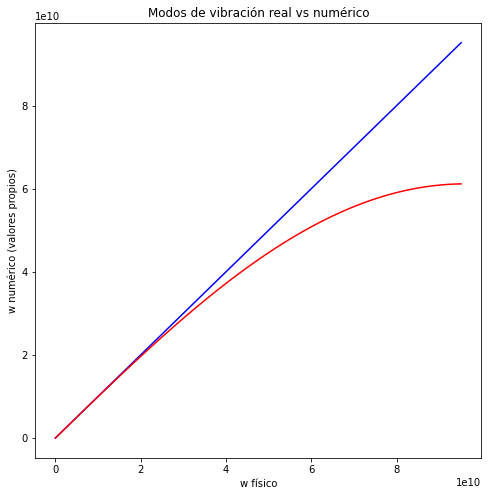

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))

plt.plot(n2,n2,'b')
plt.plot(n2,L2,'r')
axes.set_title("Modos de vibración real vs numérico")
plt.xlabel("w físico")
plt.ylabel("w numérico (valores propios)")

In [24]:
err_k=abs(n2-L2)

for e in range(0,len(L2)):
    if n2[e]!=0:
        err_k_p=(err_k/n2)*100
    else:
        err_k_p=0
        

<ipython-input-24-78962cd075c2>:5: RuntimeWarning: divide by zero encountered in true_divide
  err_k_p=(err_k/n2)*100


In [25]:
lista = []
errorAceptable = input('Ingrese el error aceptable para el método: ')
errorAceptable = float(errorAceptable)
for error in zip(*np.where(err_k_p<=errorAceptable)):   #Guardo el indice de los errores que estan por debajo del % de error aceptable
    error = error[0]
    lista.append(error)
    
lenlista = len(lista)

print(lista,lenlista)

lista_aux = lista[:]

for j in lista_aux:
    if j >= 100:
        lista.remove(j)                #Elimino los errores que cumplen el criterio a frecuencias altas porque antes incluye error muy alto
        
nlen=len(lista)       
nindex=lista[nlen-1]


Ingrese el error aceptable para el método: 1
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] 15


In [26]:
n3=n2[0:nlen]              
L3= L2[0:nlen]                  #Como los valores propios ya se habían ordenado y se habían tomado solo los positivos, se toman los valores que incluyan las frecuencias aceptadas de acuerdo al error
Vp3=Vp1[:, cero:cero+nlen]      #Los vectores propios ordenados incluyen negativos y positivos entonces tomamos las columnas correspondientes a los valores propios tomados antes y se acotan con el error


Text(0, 0.5, 'w numérico (valores propios)')

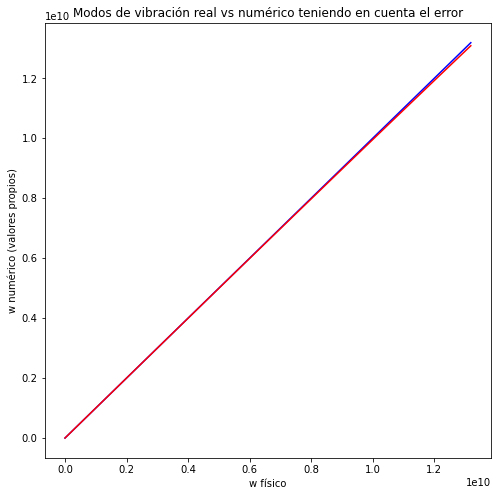

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))

plt.plot(n3,n3,'b')
plt.plot(n3,L3,'r')
axes.set_title("Modos de vibración real vs numérico teniendo en cuenta el error")
plt.xlabel("w físico")
plt.ylabel("w numérico (valores propios)")

### Determinar frecuencias asociadas a los valores propios

In [28]:
fnum = np.zeros(nlen)
for j in range(0,nlen):
    
    fnum[j] = (L3[j])/(2*np.pi)
    
fnum

array([4.24579671e-07, 1.49890304e+08, 2.99745061e+08, 4.49528733e+08,
       5.99205796e+08, 7.48740756e+08, 8.98098148e+08, 1.04724255e+09,
       1.19613860e+09, 1.34475098e+09, 1.49304444e+09, 1.64098382e+09,
       1.78853404e+09, 1.93566010e+09, 2.08232711e+09])

In [29]:
Vp3_E=Vp3[::2]                                   #Se toman los valores pares de las filas en la matriz, correspondientes a los campos eléctricos
Vp3_H=Vp3[1::2]                                  #Se toman los valores impares de las filas en la matriz, correspondientes a los campos magnéticos
fila=len(Vp3_E[1,:])                             #El tamaño de una columna de la matriz de campos 
E=np.zeros((len(zE),fila),dtype=np.complex_)
H=np.zeros((len(zH),fila),dtype=np.complex_)
len(Vp3_E),len(E),len(zE),len(zH),len(H)

(103, 103, 103, 102, 102)

In [30]:
for i in range(0,fila):
    E[:,i]=Vp3_E[:,i]
    H[:,i]=Vp3_H[:,i]

In [31]:
def cav_vacio(frecuencia):
    fig = plt.figure(figsize=(14, 20))
    aE1 = fig.add_subplot(321)
    aH1 = fig.add_subplot(322)
    aE2 = fig.add_subplot(323)
    aH2 = fig.add_subplot(324)
    aE3 = fig.add_subplot(325)
    aH3 = fig.add_subplot(326)

# Plot

    
    aE1.plot(zE, E[:,frecuencia].real,color='blue', linewidth=1)
    aH1.plot(zH, H[:,frecuencia].imag,color='red', linewidth=1)


    aE2.plot(zE, E[:,frecuencia].imag,color='blue', linewidth=1)
    aH2.plot(zH, H[:,frecuencia].real,color='red', linewidth=1)


    aE3.plot(zE, abs(E[:,frecuencia]),color='blue', linewidth=1)
    aH3.plot(zH, abs(H[:,frecuencia]),color='red', linewidth=1)
    
    plt.autoscale(enable=True, axis='y')
    plt.autoscale(enable=True, axis='x')

    plt.suptitle('campos E y H')
    plt.xlabel('z')

    return()


In [33]:
interact(cav_vacio,frecuencia=(0,fila-1))

interactive(children=(IntSlider(value=7, description='frecuencia', max=14), Output()), _dom_classes=('widget-i…

<function __main__.cav_vacio(frecuencia)>